# Basic Building Block : pd.Timestamp

In [1]:
import pandas as pd

In [2]:
from datetime import datetime

In [3]:
time_stamp= pd.Timestamp(datetime(2017,1,1))

In [4]:
time_stamp

Timestamp('2017-01-01 00:00:00')

In [9]:
pd.Timestamp('2017-01-01') == time_stamp # Understands dates as string

True

In [10]:
time_stamp.year

2017

In [12]:
time_stamp.weekday_name

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """Entry point for launching an IPython kernel.


'Sunday'

In [13]:
time_stamp.hour

0

In [14]:
time_stamp.month

1

In [15]:
time_stamp.day

1

# More Building Block : pd.Period & freq

In [17]:
period = pd.Period('2017-01')
period #Default month - end

Period('2017-01', 'M')

In [19]:
period.asfreq('D') #Convert to Daily

Period('2017-01-31', 'D')

In [20]:
period + 2

Period('2017-03', 'M')

In [21]:
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

In [22]:
pd.Timestamp('2017-01-31' , 'M') + 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  """Entry point for launching an IPython kernel.


Timestamp('2017-02-28 00:00:00', freq='M')

# Sequences of Dates & Time

In [25]:
index = pd.date_range(start = '2017-1-1',periods = 12 ,  freq = 'M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [26]:
index[0]

Timestamp('2017-01-31 00:00:00', freq='M')

In [28]:
import numpy as np

In [33]:
data = np.random.random(size=(12,2))
data

array([[0.69335188, 0.42189817],
       [0.65686243, 0.16352977],
       [0.58572322, 0.50842927],
       [0.84753173, 0.28477778],
       [0.23451729, 0.2384577 ],
       [0.34612494, 0.53116993],
       [0.05038585, 0.42194271],
       [0.1446853 , 0.77569412],
       [0.26481701, 0.68073201],
       [0.21958435, 0.71136376],
       [0.23800128, 0.5072309 ],
       [0.68089988, 0.25181175]])

In [34]:
pd.DataFrame(data= data , index = index)

,0,1
2017-01-31,0.693352,0.421898
2017-02-28,0.656862,0.163530
2017-03-31,0.585723,0.508429
2017-04-30,0.847532,0.284778
2017-05-31,0.234517,0.238458
2017-06-30,0.346125,0.531170
2017-07-31,0.050386,0.421943
2017-08-31,0.144685,0.775694
2017-09-30,0.264817,0.680732
2017-10-31,0.219584,0.711364


In [35]:
import pandas as pd

# Create the range of dates here
seven_days = pd.date_range(start = '2017-1-1',periods=7 , freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.weekday_name)



6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  


In [47]:
google = pd.read_csv('google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [48]:
google.info()# Date column is Object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
Date     1094 non-null object
Close    756 non-null float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [49]:
google.Date = pd.to_datetime(google.Date)

In [50]:
google.info()# Date column is datetime64 type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
Date     1094 non-null datetime64[ns]
Close    756 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [51]:
google.set_index('Date', inplace=True)


In [52]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


# Partial String Indexing

In [55]:
google['2015'].info() # Pass string for part of date

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
Close    252 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [56]:
google['2015-3': '2016-2'].info() # Slice includes last month

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
Close    252 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


In [58]:
google.loc['2016-6-1', 'Close'] # Use full date with .loc[]

734.15

In [59]:
google.asfreq('D').info() # set calendar day frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
Close    756 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB


Upsampling:
Higher frequency implies new
dates => missing data

In [60]:
google.asfreq('D').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [62]:
google = google.asfreq('B')

In [63]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [64]:
google[google.Close.isnull()] # Select missing ‘price’ values

,Close
Date,
2014-01-20,NaN
2014-02-17,NaN
2014-04-18,NaN
2014-05-26,NaN
2014-07-04,NaN
2014-09-01,NaN
2014-11-27,NaN
2014-12-25,NaN
2015-01-01,NaN


In [68]:
import matplotlib.pyplot as plt
data = pd.read_csv('nyc.csv')
# Inspect data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [69]:
# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4 KB
None


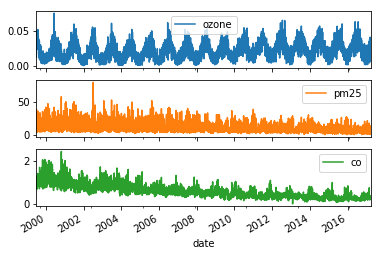

In [70]:

# Plot data
data.plot(subplots=True)
plt.show()

In [82]:
co = pd.read_csv('co_cities.csv')
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
date           1898 non-null object
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3), object(1)
memory usage: 59.4+ KB


In [83]:
co.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


In [84]:
co.date=pd.to_datetime(co.date)

In [86]:
co.head()

,date,Chicago,Los Angeles,New York
0,2005-01-01,0.317763,0.777657,0.639830
1,2005-01-03,0.520833,0.349547,0.969572
2,2005-01-04,0.477083,0.626630,0.905208
3,2005-01-05,0.348822,0.613814,0.769176
4,2005-01-06,0.572917,0.792596,0.815761


In [75]:
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 4 columns):
date           1898 non-null datetime64[ns]
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 59.4 KB


In [87]:
co.set_index('date', inplace=True)


In [88]:
co.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


In [89]:
# Set the frequency to calendar daily
co = co.asfreq('D')
co.head()


,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-02,NaN,NaN,NaN
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176


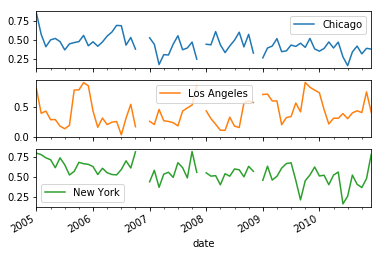

In [91]:

# Plot the data
co.plot(subplots=True)

plt.show()

             Chicago  Los Angeles  New York
date                                       
2005-01-31  0.850000     0.800498  0.799479
2005-02-28  0.575000     0.397600  0.780729
2005-03-31  0.412500     0.432972  0.740672
2005-04-30  0.502083     0.291305  0.716382
2005-05-31  0.520834     0.292753  0.615625


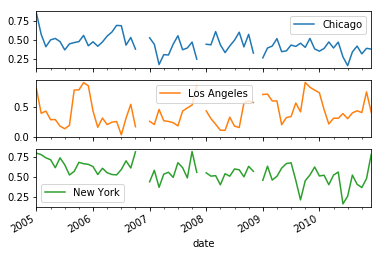

In [92]:
# Set frequency to monthly
co = co.asfreq('M')

print(co.head())
# Plot the data

co.plot(subplots=True)
plt.show()


In [97]:
import pandas as pd


In [99]:
google = pd.read_csv('google.csv',parse_dates=['Date'],index_col='Date')
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [101]:
google['shifted'] = google.Close.shift() # default: periods=1

In [102]:
google.head(3)

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95


In [106]:
google['shifted'] = google.Close.shift(periods=2) # default: periods=1
google.head(10)

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,NaN,NaN
2014-01-04,NaN,556.00,NaN
2014-01-05,NaN,551.95,558.10
2014-01-06,558.10,NaN,568.86
2014-01-07,568.86,NaN,570.04
2014-01-08,570.04,558.10,564.55
2014-01-09,564.55,568.86,564.52
2014-01-10,564.52,570.04,NaN


In [ ]:
google['lagged'] = google.Close.shift(periods=-1)

In [107]:
google.head()

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,NaN,NaN
2014-01-04,NaN,556.00,NaN
2014-01-05,NaN,551.95,558.10
2014-01-06,558.10,NaN,568.86


In [110]:
google[['Close', 'lagged', 'shifted']].tail(3)

,Close,lagged,shifted
Date,,,
2016-12-28,785.05,782.79,NaN
2016-12-29,782.79,771.82,791.55
2016-12-30,771.82,NaN,785.05


Calculate one-period percent change

In [111]:
google['change'] = google.Close.div(google.shifted) # xt / xt-1

In [113]:
google[['Close', 'shifted', 'change']].head(3)

,Close,shifted,change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,NaN,NaN
2014-01-04,NaN,556.0,NaN


In [114]:
google['return'] = google.change.sub(1).mul(100)

In [116]:
google[['Close', 'shifted', 'change', 'return']].head(3)

,Close,shifted,change,return
Date,,,,
2014-01-02,556.00,NaN,NaN,NaN
2014-01-03,551.95,NaN,NaN,NaN
2014-01-04,NaN,556.0,NaN,NaN


In [118]:
google['diff'] = google.Close.diff() # xt - xt-1

In [120]:
google[['Close', 'diff']].head(6)

,Close,diff
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,-4.05
2014-01-04,NaN,NaN
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN
2014-01-07,568.86,10.76


In [130]:
google['diff'] = google.Close.diff(3) # xt - xt-1
google[['Close', 'diff']].head(10)

,Close,diff
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-06,558.10,NaN
2014-01-07,568.86,12.86
2014-01-08,570.04,18.09
2014-01-09,564.55,6.45
2014-01-10,564.52,-4.34
2014-01-13,560.93,-9.11
2014-01-14,574.13,9.58


In [122]:
google['pct_change'] = google.Close.pct_change().mul(100)

In [124]:
google[['Close', 'return', 'pct_change']].head(3)

,Close,return,pct_change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,NaN,-0.728417
2014-01-04,NaN,NaN,0.000000


In [127]:
google['return_3d'] = google.Close.pct_change(3).mul(100)
google[['Close', 'return_3d']].head()

,Close,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-04,NaN,NaN
2014-01-05,NaN,-0.728417
2014-01-06,558.10,1.114231


In [128]:
#(558.10-551.95)/551.95*100

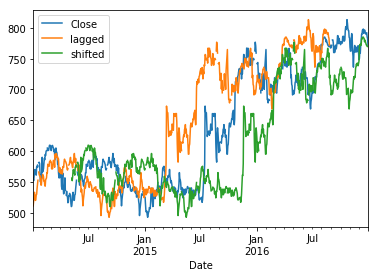

In [129]:
# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()


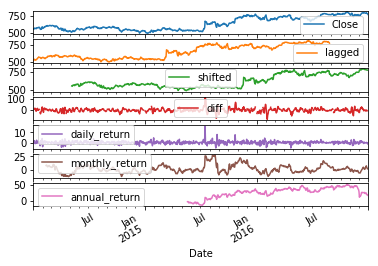

In [131]:
# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()